# Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Loading the raw data

In [3]:
raw_data=pd.read_csv('1.04.+Real-life+example.csv')

In [4]:
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


# Preprocessing

## Exploring the descriptive statistics of the variables

In [5]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [6]:
#only numerical variables' descriptions we got

In [7]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
#Now we have descriptives for categorical variables too

In [9]:
#we are dropping the 'model' parameter as it doesn,t impact our prediction much
#axis=0 is rows, axis=1 is columns

In [10]:
data=raw_data.drop(['Model'],axis=1)
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [11]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Dealing with missing values

In [12]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [13]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [14]:
#this shows the number of null values in case of each parameter

In [15]:
data_no_mv=data.dropna(axis=0)

In [16]:
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [17]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [18]:
#those NaN values have been dropped and hence mean, etc values change

# Exploring the PDFs

C:\Users\DHARANIDHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

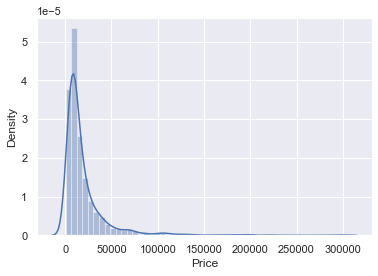

In [19]:
sns.distplot(data_no_mv['Price'])

# Dealing with outliers

In [20]:
# remove the top 1% ..outliers are those which lie far away from majority and hence affect regression

In [21]:
q=data_no_mv['Price'].quantile(0.99)
data1=data_no_mv[data_no_mv['Price']<q]
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


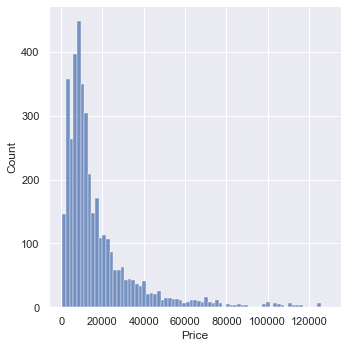

In [22]:
sns.displot(data1['Price'])

In [23]:
#here we have less number of outliers

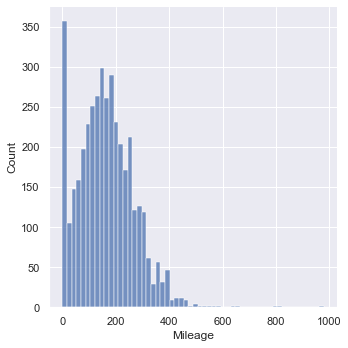

In [24]:
sns.displot(data_no_mv['Mileage'])

In [25]:
#this implies that mileage also has the same issue of outliers

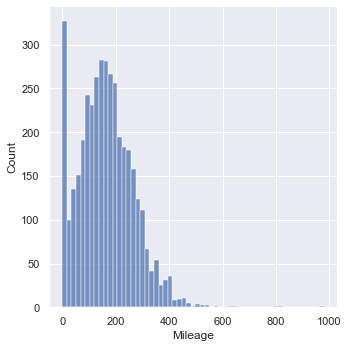

In [69]:
q=data_no_mv['Price'].quantile(0.99)
data_2=data_no_mv[data_no_mv['Price']<q]
sns.displot(data_2['Mileage'])

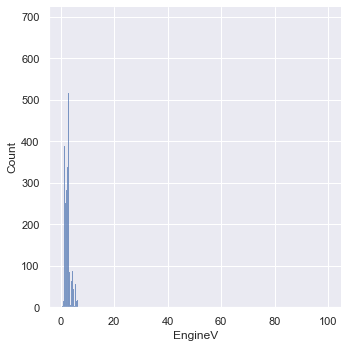

In [70]:
sns.displot(data_no_mv['EngineV'])

In [28]:
# Upon manually checcking engineV values some absurd values are found {normal range is 0.6 to 6.5}

In [71]:
data_3=data_2[data_2['EngineV']<6.5]

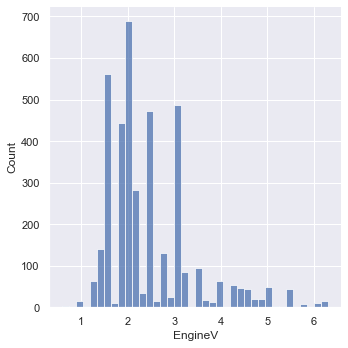

In [72]:
sns.displot(data_3['EngineV'])

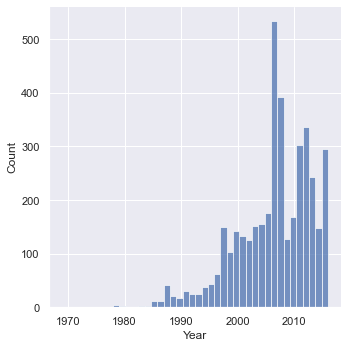

In [73]:
sns.displot(data_no_mv['Year'])

In [32]:
#here the outliers lie on the left hand side

In [74]:
q=data_no_mv['Year'].quantile(0.1)
data_4=data_no_mv[data_no_mv['Year']>q]

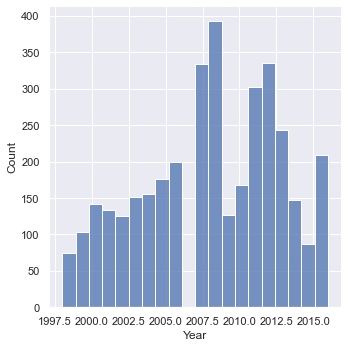

In [75]:
sns.displot(data_4['Year'])

In [37]:
#currently the indices refer to all the observations, even the ones we removed

In [76]:
data_cleaned=data_4.reset_index(drop=True)

In [77]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3607,3607.000000,3607,3607.000000,3607.000000,3607,3607,3607.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,781,NaN,1266,NaN,NaN,1754,3289,NaN
mean,NaN,21324.244486,NaN,150.971167,2.756998,NaN,NaN,2007.987801
std,NaN,26690.172045,NaN,94.175311,4.648325,NaN,NaN,4.792866
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,1998.000000
25%,NaN,8200.000000,NaN,85.000000,1.800000,NaN,NaN,2005.000000
50%,NaN,12700.000000,NaN,149.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,23500.000000,NaN,210.000000,3.000000,NaN,NaN,2012.000000


# Checking the OLS assumptions

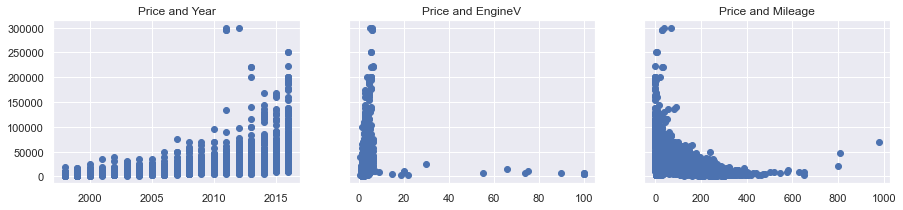

In [78]:
f, (ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

# Relaxing the assumptions

### Log transformation

In [79]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,12.206068
...,...,...,...,...,...,...,...,...,...
3602,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3603,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3604,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3605,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


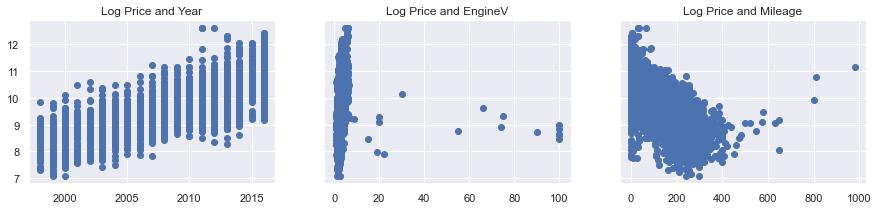

In [80]:
f, (ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

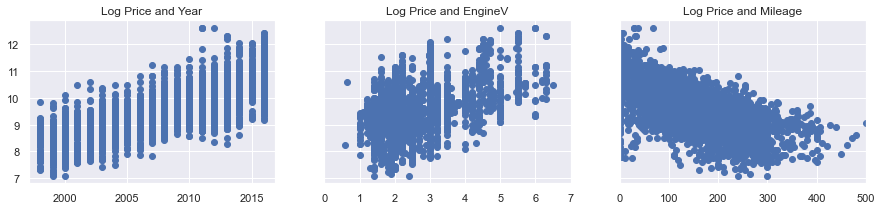

In [81]:
f, (ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set(xlim=(0,7))
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set(xlim=(0,500))
ax3.set_title('Log Price and Mileage')

plt.show()

In [48]:
#in above the x-axis scale has been adjusted

In [49]:
# linear pattern is now observed in all the three plots

In [82]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

# Multicollinearity

In [83]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [84]:
# the 'Year' and 'Mileage' are bound to have some collinearity
#the newer the car, the lesser the mileage

In [85]:
#sklearn doesn't have any specific method to check multicollinearity so we move to statsmodels
# one of the best ways is VIF(variance inflation factor)

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif["features"]=variables.columns

In [55]:
vif

,VIF,features
0,3.553054,Mileage
1,3.857254,Year
2,1.352541,EngineV


In [58]:
#vif=1 => no multicollinearity
# 1<vif<5=> perfectly okay
# Larger values of vif are unacceptable (vif>10)
# if any feature is found to have vif>10, drop it (because it has high multicollinearity)

# Creating dummy variables

In [59]:
# we have dealt with numerical data and so now we will create dummy variables for categorical datas

In [60]:
#if we have N categories for a feature, we need to create N-1 dummies

In [91]:
data_with_dummies=pd.get_dummies(data_cleaned,drop_first=True)

In [92]:
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,0,5.5,2016,12.206068,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


### Rearranging a bit

In [96]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [97]:
cols=[ 'log_price','Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [98]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.974618,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,9.495519,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,12.206068,0,5.5,2016,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

## Declare the inputs and targets 

In [108]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

## Scaling the data 

In [109]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [110]:
inputs_scaled=scaler.transform(inputs)

## Train test split 

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train, x_test, y_train, y_test=train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

# Creating the regression

In [113]:
reg=LinearRegression()

In [114]:
reg.fit(x_train,y_train)

LinearRegression()

In [115]:
# Infact this is a log-linear regression because the dependant variable is log of 'Price'

In [116]:
y_hat=reg.predict(x_train)

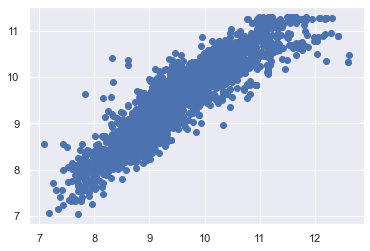

In [118]:
plt.scatter(y_train,y_hat)

plt.show()


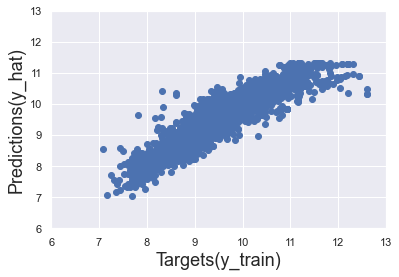

In [119]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)', size=18)
plt.ylabel('Predictions(y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

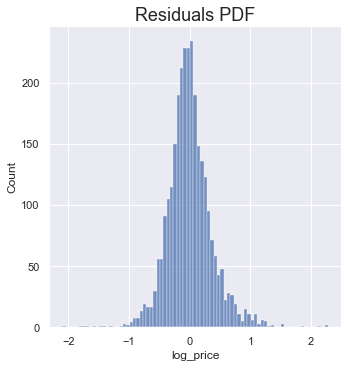

In [121]:
sns.displot(y_train-y_hat)
plt.title('Residuals PDF', size=18)
plt.show()

In [122]:
reg.score(x_train,y_train)

0.8175747708347115

# Finding the weights and bias

In [123]:
reg.intercept_

9.553795994189016

In [124]:
reg.coef_

array([-0.08886708,  0.02399629,  0.44808561,  0.03269201,  0.05213456,
       -0.18305378, -0.26934024, -0.0893815 , -0.16322406, -0.17442274,
       -0.11512312, -0.21875555, -0.1496454 , -0.22803025, -0.01863152,
       -0.01557517, -0.02347704,  0.23678109])

In [126]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.088867
1,EngineV,0.023996
2,Year,0.448086
3,Brand_BMW,0.032692
4,Brand_Mercedes-Benz,0.052135
5,Brand_Mitsubishi,-0.183054
6,Brand_Renault,-0.269340
7,Brand_Toyota,-0.089381
8,Brand_Volkswagen,-0.163224
9,Body_hatch,-0.174423


In [127]:
# positive weight means with increase in that feature price increases
# negative weight means with increase in that feature price decreases

In [129]:
# for dummy variables, a poistive weight means that the brand is more expensive than benchmark(the one which had all 0)

In [130]:
data_cleaned['Brand'].unique()

array(['Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW',
       'Mitsubishi'], dtype=object)

In [131]:
#'Audi' is missing in the table above and hence it is the benchmark

# Testing

In [132]:
y_hat_test = reg.predict(x_test)

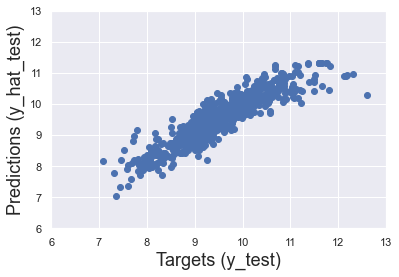

In [133]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

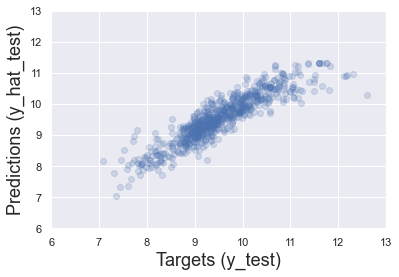

In [134]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [135]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,26195.786820
1,17802.320668
2,16255.697451
3,35722.995722
4,8340.010644


In [136]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,26195.786820,NaN
1,17802.320668,NaN
2,16255.697451,NaN
3,35722.995722,NaN
4,8340.010644,NaN
...,...,...
717,8703.909572,NaN
718,17060.124130,NaN
719,9935.413776,NaN
720,28171.266212,23000.0


In [137]:
y_test

3299    10.537415
159      9.778491
2502    10.584056
2337    11.127263
352      9.169518
          ...    
492      8.922658
2157     9.705037
3061     9.332558
1625     9.797571
2046     9.602382
Name: log_price, Length: 722, dtype: float64

In [138]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    10.537415
1     9.778491
2    10.584056
3    11.127263
4     9.169518
Name: log_price, dtype: float64

In [139]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,26195.786820,37700.0
1,17802.320668,17650.0
2,16255.697451,39500.0
3,35722.995722,68000.0
4,8340.010644,9600.0
...,...,...
717,8703.909572,7500.0
718,17060.124130,16400.0
719,9935.413776,11300.0
720,28171.266212,17990.0


In [140]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [141]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,26195.786820,37700.0,11504.213180,30.515154
1,17802.320668,17650.0,-152.320668,0.863007
2,16255.697451,39500.0,23244.302549,58.846336
3,35722.995722,68000.0,32277.004278,47.466183
4,8340.010644,9600.0,1259.989356,13.124889
...,...,...,...,...
717,8703.909572,7500.0,-1203.909572,16.052128
718,17060.124130,16400.0,-660.124130,4.025147
719,9935.413776,11300.0,1364.586224,12.075984
720,28171.266212,17990.0,-10181.266212,56.594031


In [142]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,722.000000,722.000000,722.000000,722.000000
mean,18411.233384,20671.852687,2260.619303,28.379625
std,14872.741984,26064.847280,18093.982448,29.187990
min,1136.738321,1200.000000,-34578.834455,0.154047
25%,8618.520663,8200.000000,-2907.772641,10.248078
50%,13738.598572,12139.500000,-322.307512,19.513067
75%,23790.723740,22900.000000,2306.985017,38.881180
max,81408.347486,300000.000000,270826.224154,296.379115


In [143]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
233,20966.65,20999.00,32.35,0.15
231,5710.54,5700.00,-10.54,0.18
565,9979.45,9999.00,19.55,0.20
694,14968.30,14999.00,30.70,0.20
367,13242.13,13200.00,-42.13,0.32
220,15440.56,15500.00,59.44,0.38
529,27160.62,27300.00,139.38,0.51
90,9549.08,9499.00,-50.08,0.53
336,2881.72,2900.00,18.28,0.63
217,7351.71,7300.00,-51.71,0.71
